In [1]:
pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=59a4292fa8f75e4c5fe62f1ee786f91212600cd3c4de0714265fb3e67f9fd90e
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
import wikipedia
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.manifold import TSNE

In [3]:
# Download articles from Wikipedia for a given category
def download_articles(category, n_articles=100):
    wikipedia.set_lang("en")
    search_results = wikipedia.search(category, results=n_articles)
    articles = {}  # empty dictionary to store the articles

    for result in search_results:
        try:
            page = wikipedia.page(result)
            articles[result] = page.content  # Store in the articles dictionary
        except (wikipedia.exceptions.PageError, wikipedia.exceptions.DisambiguationError):
            continue

    return articles  # Return the downloaded articles as a dictionary


In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert the text to lowercase
    tokenized_text = word_tokenize(text)  # Tokenize the text into individual words
    cleaned_text = [word for word in tokenized_text if word not in stopwords.words('english')]
    # Remove stopwords from the tokenized text
    return cleaned_text

In [6]:
# Categories for which articles will be downloaded and preprocessed
categories = ['Art and culture', 'Food and Nutrition', 'Renewable energy', 'Sports and Entertainment']

# Empty dictionary to store the preprocessed articles for each category
category_articles = {}

# Iterate over each category
for category in categories:
    # Download articles for the current category
    articles = download_articles(category)

    # Preprocess the content of each article using the preprocess_text function
    preprocessed_articles = [preprocess_text(content) for content in articles.values()]

    # Store the preprocessed articles for the current category in the category_articles dictionary
    category_articles[category] = preprocessed_articles

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


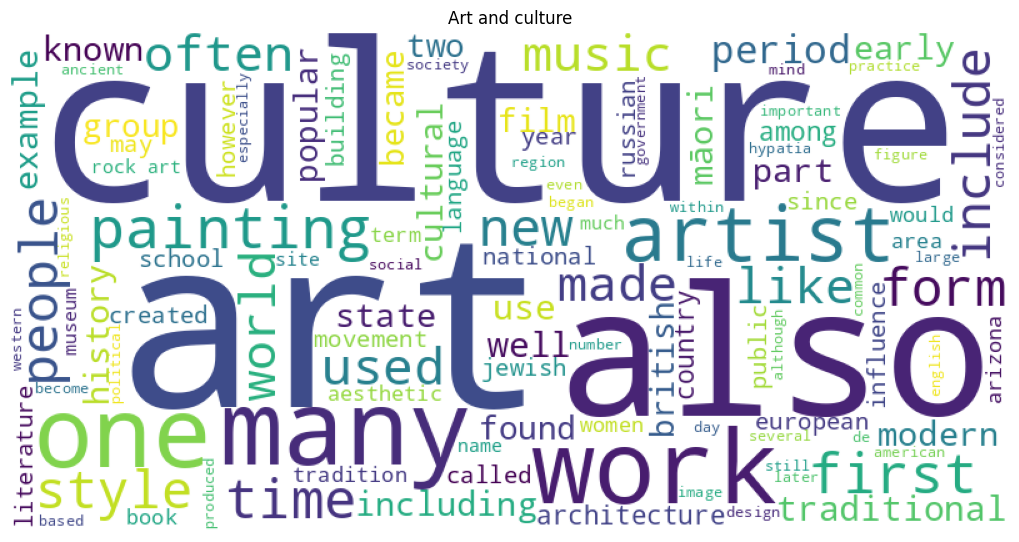

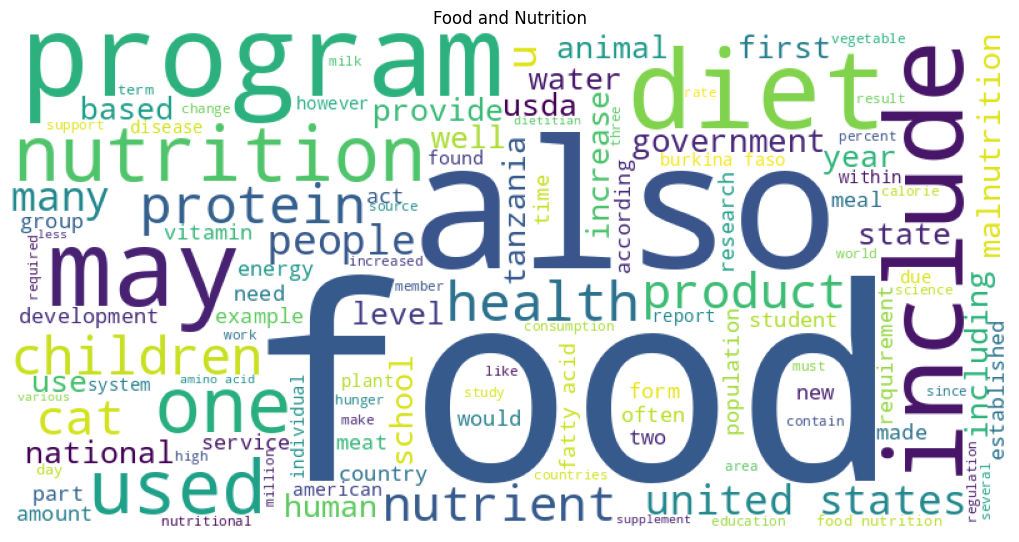

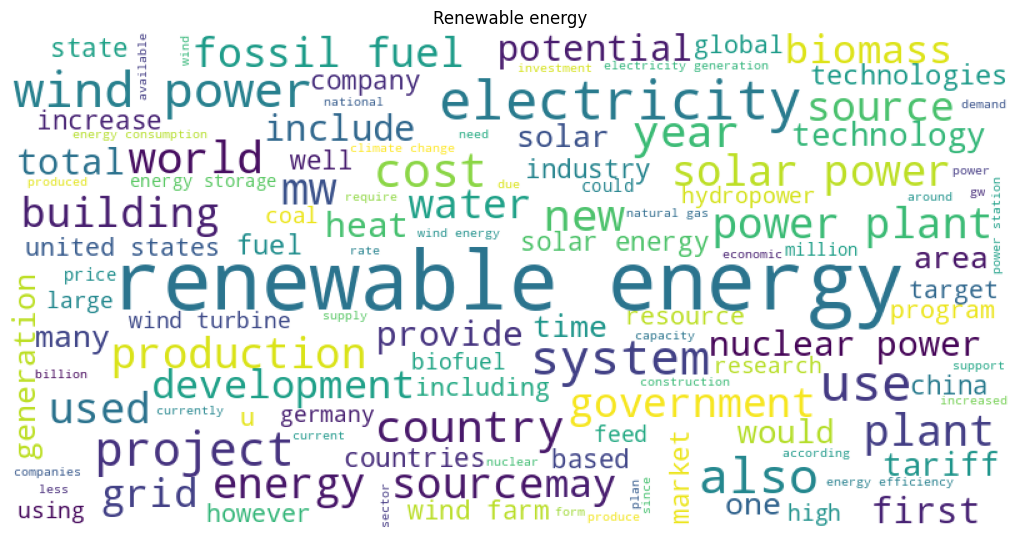

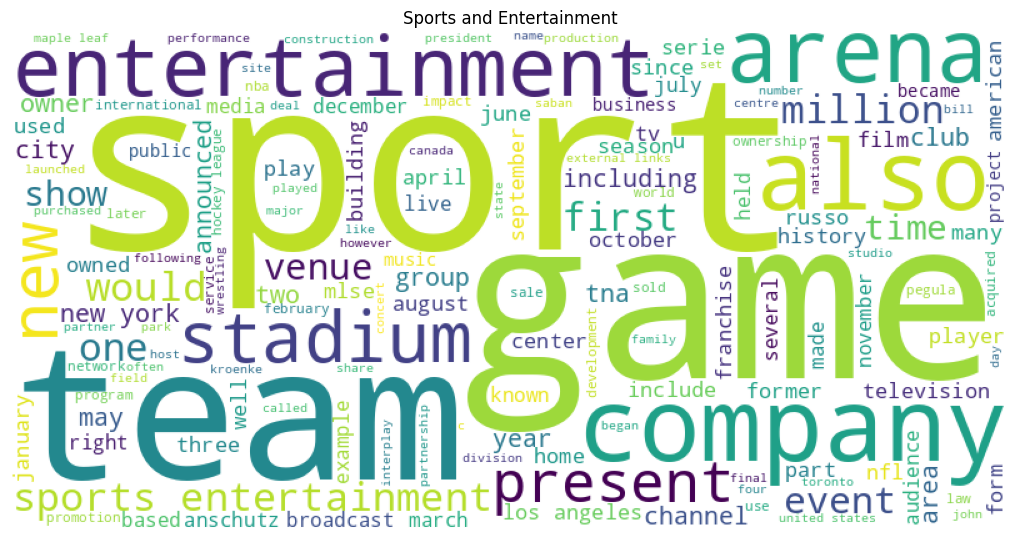

In [7]:
# Create word clouds for each category
for category, articles in category_articles.items():
    # Flatten the list of preprocessed articles into a single list of words
    all_words = [word for sublist in articles for word in sublist]

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords.words('english'), min_font_size=10).generate(" ".join(all_words))

    # Display the word cloud
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(category)
    plt.show()
    print("\n")

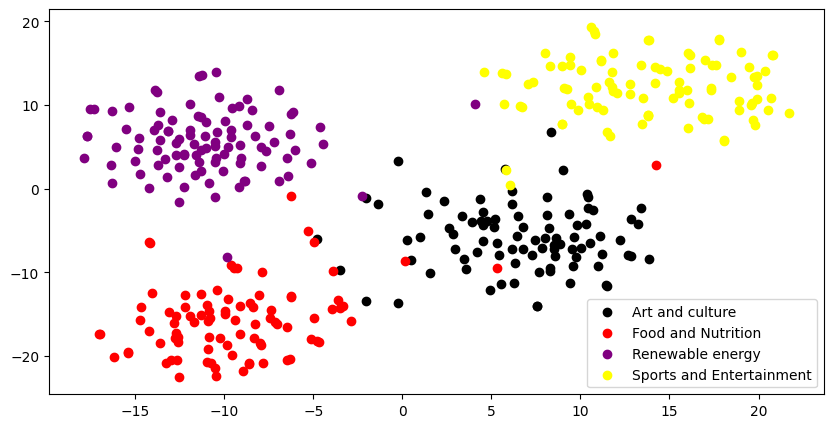

In [12]:
# Convert articles into TF-IDF vectors
vectorizer = TfidfVectorizer()
flattened_articles = [" ".join(article) for sublist in category_articles.values() for article in sublist]
X = vectorizer.fit_transform(flattened_articles)
X_embedded = TSNE(n_components=2).fit_transform(X.toarray())

# Define the colors for each category
category_colors = {
    'Art and culture': 'black',
    'Food and Nutrition': 'red',
    'Renewable energy': 'purple',
    'Sports and Entertainment': 'yellow'
}

# Create a list of labels for each data point
labels = [category for category in category_articles.keys() for article in category_articles[category]]

# Create a scatter plot of the t-SNE embeddings
plt.figure(figsize=(10, 5))
for i, category in enumerate(categories):
    # Select the data points and colors for the current category
    category_indices = np.array(labels) == category
    category_color = category_colors[category]

    # Scatter plot the data points with the corresponding color and label
    plt.scatter(X_embedded[category_indices, 0], X_embedded[category_indices, 1],
                label=category, color=category_color)

plt.legend()  # Show the legend
plt.show()

Conclusion :

The misgrouping of articles in the t-SNE visualization can be explained by the following factors:

Overlapping Themes: Some articles may cover topics that are relevant to multiple themes. For example, there could be articles discussing the intersection of art and renewable energy, leading to misgrouping between the Art and Culture and Renewable Energy categories.

Dynamic Nature of Data: Wikipedia is an open platform where users can modify and update content. This can result in misclassifications or mislabeling of articles, leading to incorrect grouping in the visualization. For instance, an article related to food and nutrition might be mistakenly categorized under Sports and Entertainment due to user input errors.

Limitations of TF-IDF Vectorization: The TF-IDF vectorizer may not effectively capture the distinguishing features of misgrouped articles. Exploring alternative vectorization techniques, such as n-gram vectorizers, can help improve the differentiation of article themes and reduce misclassification.

Text Preprocessing: Inadequate text preprocessing, such as not removing punctuation, numbers, or performing lemmatization, can contribute to misgrouping. Implementing robust text preprocessing techniques can enhance the quality of the article representations and improve clustering accuracy.

By addressing these factors through alternative vectorization techniques, considering the dynamic nature of data, and applying comprehensive text preprocessing, we can improve the accuracy of the t-SNE visualization and gain more meaningful insights into the relationships between different themes.